## It is important for websites to analyze traffic data
The data set provided (traffic.csv) contains web traffic data ("events") from a few different pages ("links") over a period of 7 days including various categorical dimensions about the geographic origin of that traffic as well as a page's content: isrc.  
Let's develop ideas how to increase the links' clickrates.

### EDA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# load the data set
df = pd.read_csv("/Users/bryancoronelnew/Documents/projects/stratascratch/Linkfire/data/traffic.csv")

In [3]:
df.shape

(226278, 9)

In [4]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [5]:
# print descriptive statistics about each column
df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


Because all of our columns are of type object, the descriptive statistics provide a summary that is relevant to a categorical attribute.   
If data were numerical, describe() method would output different properties, like mean, max, min value, etc.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


### How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [15]:
# the data set records three types of events: pageview, click, preview
df["event"].value_counts().pageview

142015

Approach:
1. filter only for 'pageview' events
2. group by the date
3. keep only the 'event' column, and specify a 'count' aggregation

In [7]:
df[df["event"] == "pageview"].groupby(by="date")["event"].count()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

note: this data allows for duplicates so our values would be different if we were to use drop_duplicates()

#### What about the other recorded events?

Note: Instead of hard-coding easy solution, we are going to apply some set operations that would generalize to other events as well.   
Data is constantly changing in the real world and the following solution would still work if it did

In [18]:
# get the set of recorded events in the data
recorded_events = set(df["event"].unique())
# remove the 'pageview' event
recorded_events.remove("pageview")
recorded_events

{'click', 'preview'}

In [20]:
# loop over each event
for recorded_event in recorded_events:
    # get the total number of occurrences
    total_events = df[df["event"] == recorded_event].shape[0]
    print("Total number of", recorded_event, "events is", total_events, "\n")
    # group by the date and aggregate by count
    data_set = df[df["event"] == recorded_event].groupby(by="date")["event"].count()
    print(f"{recorded_event} event distribution per day:\n")
    print(data_set, "\n")

Total number of click events is 55732 

click event distribution per day:

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64 

Total number of preview events is 28531 

preview event distribution per day:

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64 



### Which countries did the clicks come from?

1. We need to filter for the click events only  
2. print the unique values of the Country column (ignoring any nan's)

In [24]:
# filter for the proper event
countries = df[df["event"] == "click"]["country"].dropna().unique()

array(['Saudi Arabia', 'India', 'France', 'Maldives', 'United States',
       'Sierra Leone', 'United Kingdom', 'Sweden', 'United Arab Emirates',
       'Qatar', 'Germany', 'Albania', 'Iraq', 'Romania', 'Morocco',
       'Kuwait', 'Nigeria', 'Finland', 'Bangladesh', 'Fiji', 'Turkey',
       'Russia', 'Belgium', 'Norway', 'Cabo Verde', 'Italy', 'Austria',
       'Libya', 'Pakistan', 'Bahrain', 'Tunisia', 'DR Congo', 'Australia',
       'Canada', 'Kenya', 'French Guiana', 'Jordan', 'Netherlands',
       'Somalia', 'Mexico', 'Oman', 'Sri Lanka', 'Ecuador', 'Latvia',
       'Guatemala', 'South Africa', 'Bosnia and Herzegovina', 'Yemen',
       'Switzerland', 'Slovenia', 'Mauritania', 'Cameroon', 'Spain',
       'Thailand', 'Egypt', 'Poland', 'Ghana', 'Gabon', 'Greece',
       'Burkina Faso', 'Malaysia', 'Zambia', 'American Samoa', 'Algeria',
       'Uganda', 'Bulgaria', 'Denmark', 'Colombia', 'Portugal', 'Senegal',
       'Ireland', 'Panama', 'Serbia', 'Haiti', 'Honduras', 'Tanzania',
    

Observation:
1. 202 countries returned, while there are 211 unique countries in the entire data set, 
2. so there are 9 countries where we have not recorded a click event.  
    a. follow up question would be to find out which are those 9 countries.

In [34]:
# take all countries in the column and compare against the ones that had a click
# at least one of the data structs gotta be a set in order to use difference()
set(df["country"].unique()).difference(countries)

{'Afghanistan',
 'Andorra',
 'Faroe Islands',
 'Guinea-Bissau',
 'Jersey',
 'Lesotho',
 'Macao',
 'Samoa',
 'Sint Maarten',
 nan}

### What was the overall click rate (clicks/pageviews)?

click rate:
- num of clicks page has received (event = 'click') divided by num times it's been shown (event = 'pageview').   
- It is a commonly used metric that measures the success of an advertising campaign.

In [39]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'pageview' events
pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index()
pageviews = pageviews.rename(columns={
    "event": "pageviews"
})

In [73]:
# pd.merge() does a database-style inner join of the two dataframes
df_q4 = pd.merge(left=link_clicks, right=pageviews, on="linkid", how="inner")

In [74]:
# define a new calculated column of the 'click_rate'
df_q4["click_rate"] = df_q4["clicks"] / df_q4["pageviews"]
df_q4

,linkid,clicks,pageviews,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


#### How does the clickrate distribute across different links?

In [75]:
df_q4["click_rate"].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click_rate, dtype: float64

Text(0, 0.5, 'frequency')

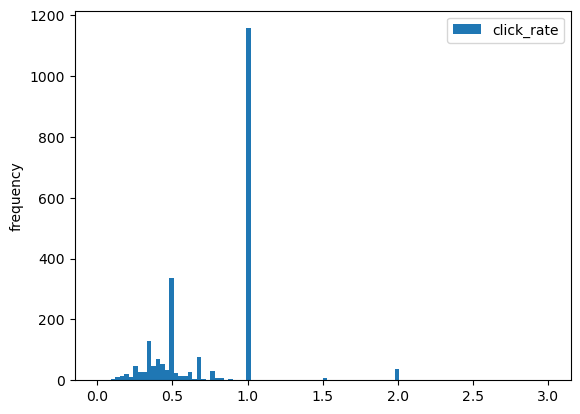

In [59]:
# let's look at visually!
ax = df_q4.plot(kind="hist",bins=100, column = "click_rate", range=[0, 3])
ax.set_ylabel("frequency")

Text(0.5, 0, 'Log2(Click Rate)')

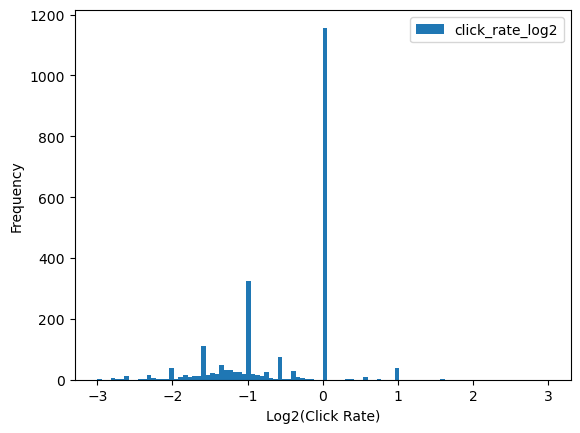

In [78]:
# because the data is highly skewed, it makes more sense to plot the log of it
df_q4["click_rate_log2"] = np.log2(df_q4["click_rate"])
ax = df_q4.plot(kind="hist",bins=100, column = "click_rate_log2", range=[-3, 3])
ax.set_xlabel("Log2(Click Rate)")

Observations:
1. enormous spike at the 0 meaning that actual click rate was 1 (inverse log)
    a. implying that there are many links that have been viewed and clicked on exactly once.  
2. many links that have been viewed many times but clicked on fewer (values less than zero)

One last thing to try is a box plot, which is basically a visualization of the describe() method.

Text(0, 0.5, 'Value')

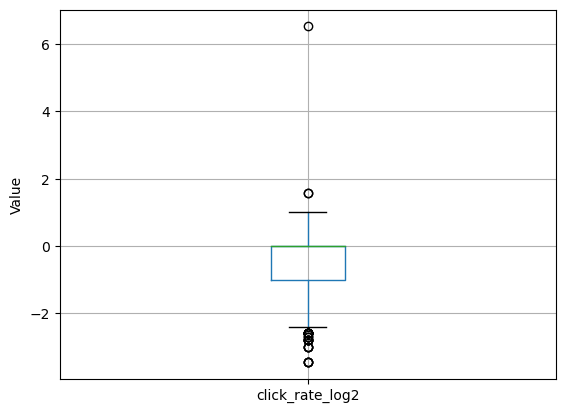

In [61]:
ax = df_q4.boxplot(column="click_rate_log2")
ax.set_ylabel("Value")

Obervation:
1. two (and one particular) high outliers
2. many, many below the Q1 (i.e., click rate very close to zero)  
    a. maybe at least two links, that have been clicked on multiple times in the same page view.

#### Any correlation between clicks and previews on a link? Is it significant? How large is the effect? 
Let's at least test for potential linear as well as categorical (think binary) relationships between both variables.

- Pearson's correlation coefficient is a measure of linear correlation between two data sets between -1 and 1  
    - positive correlation coefficient implies that both sets move in the same direction, either they both increase or decrease.

In [62]:
# filter only events that are relevant to the question
df_q6 = df[df["event"].isin(["click", "preview"])]

In [63]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'preview' events
previews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
previews = previews.rename(columns={
    "event": "previews"
})

In [65]:
# perform two database-style joins to append the 
# number of link clicks and previews to each row
df_q6 = pd.merge(left=df_q6, right=link_clicks, how="left", on="linkid")
df_q6 = pd.merge(left=df_q6, right=previews, how="left", on="linkid")

In [67]:
df_q6.head()

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0


In [68]:
# drop nulls since left join allows for clicks but no preview
df_q6.dropna(subset=["clicks", "previews"], inplace=True)

Below are two ways to calculate person's correlation coeff

In [69]:
df_q6.corr()

/var/folders/ph/hf46cbxx0bj_5t8gb0d0zsv00000gp/T/ipykernel_39199/3335628881.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_q6.corr()


,clicks,previews
clicks,1.000000,0.998713
previews,0.998713,1.000000


In [ ]:
stats.pearsonr(x=df_q6["clicks"], y=df_q6["previews"])

Observation:
1. Almost perfectly positive correlation between the number of clicks and previews which seems logical;  
    a. given that the one is actually dependent on the other (can't have clicks without previews and vice versa).

#### quantify the relationship between categorical variables in similar manner as with numerical variables Using pd.factorize()

In [71]:
# stackoverflow.com/questions/39390160
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]
factorized_df = df_q6[categorical_columns] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()
factorized_df

,country,city,artist,album,track
country,1.000000,0.189353,0.018565,0.023316,0.024796
city,0.189353,1.000000,0.103752,0.108283,0.111936
artist,0.018565,0.103752,1.000000,0.946371,0.949177
album,0.023316,0.108283,0.946371,1.000000,0.976958
track,0.024796,0.111936,0.949177,0.976958,1.000000


Observations:
1. high positive correlation between album, artist, and track
2. almost no correlation between other variables.  
    a. This is again expected, since those variables are naturally dependent, i.e., each track belongs to an album and is performed by an artist.